![https://pieriantraining.com/](../PTCenteredPurple.png)

In this lecture, we will explore the capabilities of [Amazon Rekognition](https://docs.aws.amazon.com/rekognition/), the computer vision service offered by AWS that enables automatic analysis of images and videos to identify objects, faces, text, and activities within them.

## Basic Image Analysis
In this section we will take a look at the following features of Rekognition:

- Image labeling (DetectLabels).
- Face detection and analysis (DetectFaces).
- Text detection (DetectText).


**[DetectLabels](https://docs.aws.amazon.com/rekognition/latest/APIReference/API_DetectLabels.html)** can detect objects in an image and provide information about its properties

You can use it using client.detect_labels(*Features*, *Image*), where *Features* is a list of the types of analysis to perform. It can be either GENERAL_LABELS, IMAGE_PROPERTIES or both. *Image* is either a bytestring or an S3 object provided by the following object:
```
"Image": { 
      "Bytes": blob,
      "S3Object": { 
         "Bucket": "string",
         "Name": "string",
         "Version": "string"
      }
```

NOTE: **All images need to either be in png or jpeg format!**

Let's use the following image (https://de.wikipedia.org/wiki/Katzen#/media/Datei:White_cat_Krasnaya_polyana.jpg)

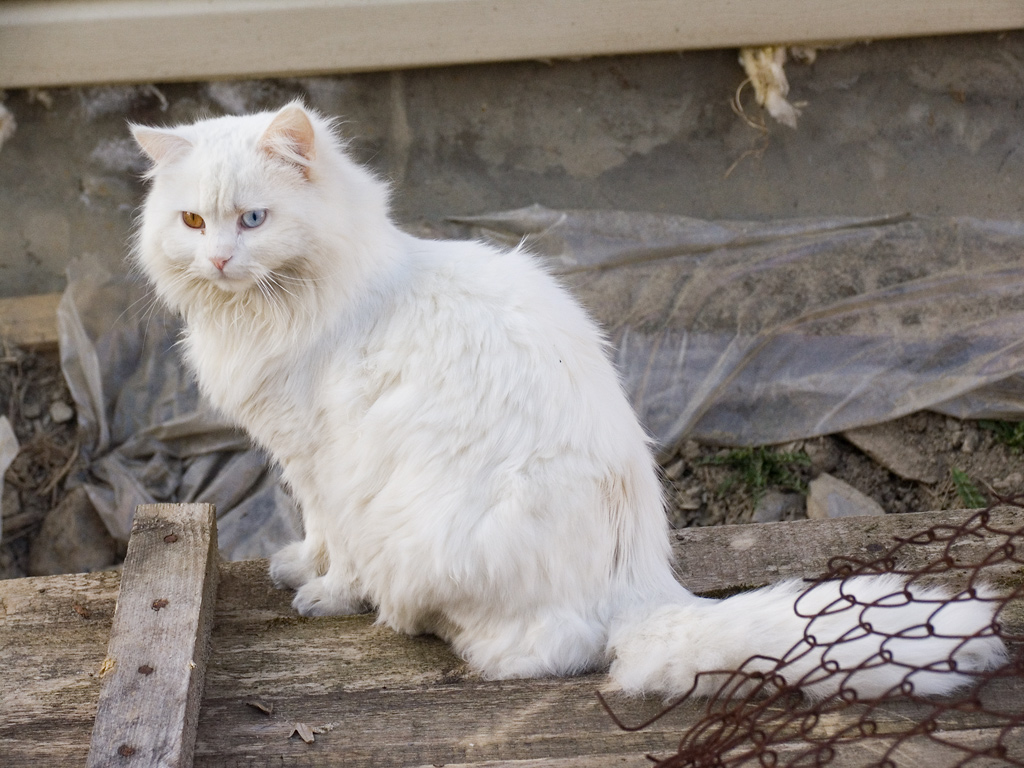

In [2]:
from PIL import Image
image_path = 'cat.jpeg'
image = Image.open(image_path)
image

In [3]:
import boto3
client = boto3.client("rekognition", region_name="us-east-1")

In [11]:
with open("cat.jpeg", "rb") as img:
    response = client.detect_labels(Features= ["GENERAL_LABELS", "IMAGE_PROPERTIES"], Image={"Bytes":img.read()})

In [12]:
response

{'Labels': [{'Name': 'Angora',
   'Confidence': 99.98700714111328,
   'Instances': [],
   'Parents': [{'Name': 'Animal'},
    {'Name': 'Cat'},
    {'Name': 'Mammal'},
    {'Name': 'Pet'}],
   'Aliases': [],
   'Categories': [{'Name': 'Animals and Pets'}]},
  {'Name': 'Animal',
   'Confidence': 99.98700714111328,
   'Instances': [],
   'Parents': [],
   'Aliases': [],
   'Categories': [{'Name': 'Animals and Pets'}]},
  {'Name': 'Cat',
   'Confidence': 99.98700714111328,
   'Instances': [{'BoundingBox': {'Width': 0.8703554272651672,
      'Height': 0.7884078621864319,
      'Left': 0.10615421086549759,
      'Top': 0.1232595443725586},
     'Confidence': 95.15201568603516,
     'DominantColors': [{'Red': 192,
       'Blue': 192,
       'Green': 192,
       'HexCode': '#c0c0c0',
       'CSSColor': 'silver',
       'SimplifiedColor': 'grey',
       'PixelPercent': 51.51515197753906},
      {'Red': 220,
       'Blue': 220,
       'Green': 220,
       'HexCode': '#dcdcdc',
       'CSSColor':

If you only want to obtain the labels / image properties you can adjust the list accordingly.

As you might have noticed, the response comes with a confidence score which is higly useful for sanity checking and also contains a bounding box.

Let's visualise the image and plot the bounding box

In [26]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [20]:
bbox_coords = response["Labels"][2]["Instances"][0]["BoundingBox"]

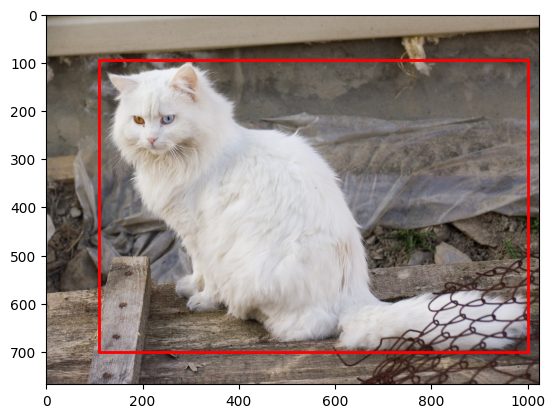

In [25]:
fig, axis = plt.subplots()
axis.imshow(image)
width = bbox_coords['Width'] * image.width
height = bbox_coords['Height'] * image.height
left = bbox_coords['Left'] * image.width
top = bbox_coords['Top'] * image.height

rect = Rectangle((left, top), width, height, linewidth=2, edgecolor='r', facecolor='none')

axis.add_patch(rect)

plt.show()


## DetectFaces

"[DetectFaces](https://docs.aws.amazon.com/rekognition/latest/APIReference/API_DetectFaces.html) detects the 100 largest faces in the image. For each face detected, the operation returns face details. These details include a bounding box of the face, a confidence value (that the bounding box contains a face), and a fixed set of attributes such as facial landmarks (for example, coordinates of eye and mouth), pose, presence of facial occlusion, and so on.
"

Its usage is similar to DetectLabels, however the first argument is called *Attributes* instead of Features.
[Here](https://docs.aws.amazon.com/rekognition/latest/APIReference/API_DetectFaces.html#rekognition-DetectFaces-request-Attributes) you can find a list of all the attributes.

Let's try it out using the default attributes! (https://upload.wikimedia.org/wikipedia/commons/5/59/Jonas_Salk_candid.jpg)

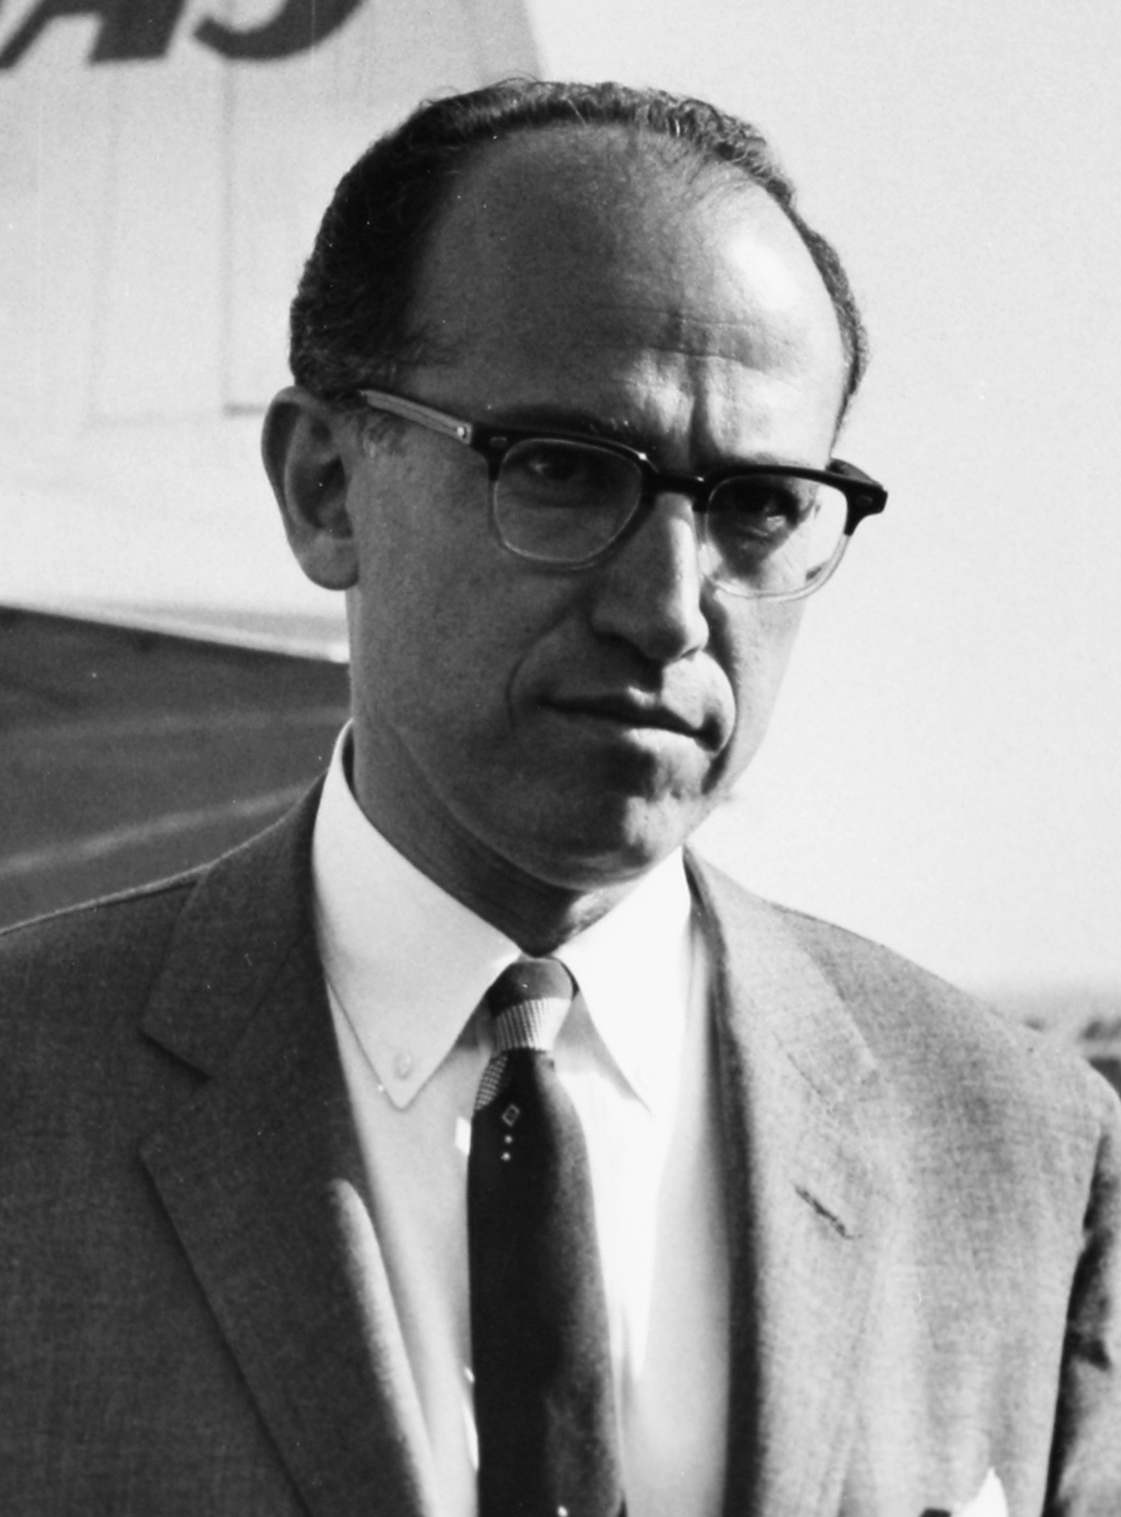

In [4]:
image_path = 'salk.jpeg'
image = Image.open(image_path)
image

In [6]:
with open("salk.jpeg", "rb") as img:
    response = client.detect_faces(Image={"Bytes":img.read()})

In [7]:
response

{'FaceDetails': [{'BoundingBox': {'Width': 0.43410515785217285,
    'Height': 0.436124712228775,
    'Left': 0.31944695115089417,
    'Top': 0.14290353655815125},
   'Landmarks': [{'Type': 'eyeLeft',
     'X': 0.5065549612045288,
     'Y': 0.31264185905456543},
    {'Type': 'eyeRight', 'X': 0.6701183915138245, 'Y': 0.3350711464881897},
    {'Type': 'mouthLeft', 'X': 0.4822967052459717, 'Y': 0.45959746837615967},
    {'Type': 'mouthRight', 'X': 0.6188957691192627, 'Y': 0.47778287529945374},
    {'Type': 'nose', 'X': 0.6075049042701721, 'Y': 0.4135933816432953}],
   'Pose': {'Roll': 11.857150077819824,
    'Yaw': 18.222143173217773,
    'Pitch': -1.659053921699524},
   'Quality': {'Brightness': 70.54915618896484,
    'Sharpness': 95.51618957519531},
   'Confidence': 99.99995422363281}],
 'ResponseMetadata': {'RequestId': '8334cbc5-d9b1-4b96-a1c1-5ca2a6ffb428',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '8334cbc5-d9b1-4b96-a1c1-5ca2a6ffb428',
   'content-type': 'applic

To identify e.g. glasses, you can use the EYEGLASSES attribute:

In [8]:
with open("salk.jpeg", "rb") as img:
    response = client.detect_faces(Attributes=["EYEGLASSES"], Image={"Bytes":img.read()})

In [9]:
response

{'FaceDetails': [{'BoundingBox': {'Width': 0.43410515785217285,
    'Height': 0.436124712228775,
    'Left': 0.31944695115089417,
    'Top': 0.14290353655815125},
   'Eyeglasses': {'Value': True, 'Confidence': 99.99999237060547},
   'Landmarks': [{'Type': 'eyeLeft',
     'X': 0.5065549612045288,
     'Y': 0.31264185905456543},
    {'Type': 'eyeRight', 'X': 0.6701183915138245, 'Y': 0.3350711464881897},
    {'Type': 'mouthLeft', 'X': 0.4822967052459717, 'Y': 0.45959746837615967},
    {'Type': 'mouthRight', 'X': 0.6188957691192627, 'Y': 0.47778287529945374},
    {'Type': 'nose', 'X': 0.6075049042701721, 'Y': 0.4135933816432953},
    {'Type': 'leftEyeBrowLeft',
     'X': 0.4380471706390381,
     'Y': 0.26726263761520386},
    {'Type': 'leftEyeBrowRight',
     'X': 0.564401388168335,
     'Y': 0.27943792939186096},
    {'Type': 'leftEyeBrowUp', 'X': 0.5112408399581909, 'Y': 0.263016015291214},
    {'Type': 'rightEyeBrowLeft',
     'X': 0.6586260795593262,
     'Y': 0.2928523123264313},
    

In [41]:
response["FaceDetails"][0]["Eyeglasses"]

{'Value': True, 'Confidence': 99.99999237060547}

## DetectText
Another important tool is [DetectText](https://docs.aws.amazon.com/rekognition/latest/APIReference/API_DetectText.html), which detects all texts in an image and converts it to a string

Let's try it on a screenshot from this notebook

In [42]:
with open("text.png", "rb") as img:
    response = client.detect_text(Image={"Bytes":img.read()})

In [43]:
response

{'TextDetections': [{'DetectedText': 'Pierian',
   'Type': 'LINE',
   'Id': 0,
   'Confidence': 100.0,
   'Geometry': {'BoundingBox': {'Width': 0.32852956652641296,
     'Height': 0.123046875,
     'Left': 0.05759083852171898,
     'Top': 0.0380859375},
    'Polygon': [{'X': 0.05759083852171898, 'Y': 0.0380859375},
     {'X': 0.38612040877342224, 'Y': 0.0380859375},
     {'X': 0.38612040877342224, 'Y': 0.1611328125},
     {'X': 0.05759083852171898, 'Y': 0.1611328125}]}},
  {'DetectedText': 'Training',
   'Type': 'LINE',
   'Id': 1,
   'Confidence': 98.44119262695312,
   'Geometry': {'BoundingBox': {'Width': 0.4090258479118347,
     'Height': 0.17578120529651642,
     'Left': 0.5831072330474854,
     'Top': 0.0283203125},
    'Polygon': [{'X': 0.5831072330474854, 'Y': 0.0283203125},
     {'X': 0.9921330809593201, 'Y': 0.0283203125},
     {'X': 0.9921330809593201, 'Y': 0.20410151779651642},
     {'X': 0.5831072330474854, 'Y': 0.20410151779651642}]}},
  {'DetectedText': 'In this lecture, 

As you can see from the documentation, you can also pass filters or a region of interest

## DetectModerationLabels
You can use [DetectModerationLabels](https://docs.aws.amazon.com/rekognition/latest/APIReference/API_DetectModerationLabels.html) to automatically analyze content for potentially [inappropriate or unsafe elements](https://docs.aws.amazon.com/rekognition/latest/dg/moderation.html).

Note that you can define a [HumanLoopConfig](https://docs.aws.amazon.com/rekognition/latest/APIReference/API_HumanLoopConfig.html) which allows you to define the configuration for human evaluation

Its usage is similar to the functions above:

In [9]:
with open("cat.jpeg", "rb") as img:
    response = client.detect_moderation_labels( Image={"Bytes":img.read()})

In [10]:
response

{'ModerationLabels': [],
 'ModerationModelVersion': '6.1',
 'ResponseMetadata': {'RequestId': '87ab5337-c1c5-4f1b-8eec-786f4fb603d8',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '87ab5337-c1c5-4f1b-8eec-786f4fb603d8',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '54',
   'date': 'Thu, 07 Sep 2023 10:26:06 GMT'},
  'RetryAttempts': 0}}

As you can see, nothing harmful could be detected in the above image of a cat!

Let's try another image

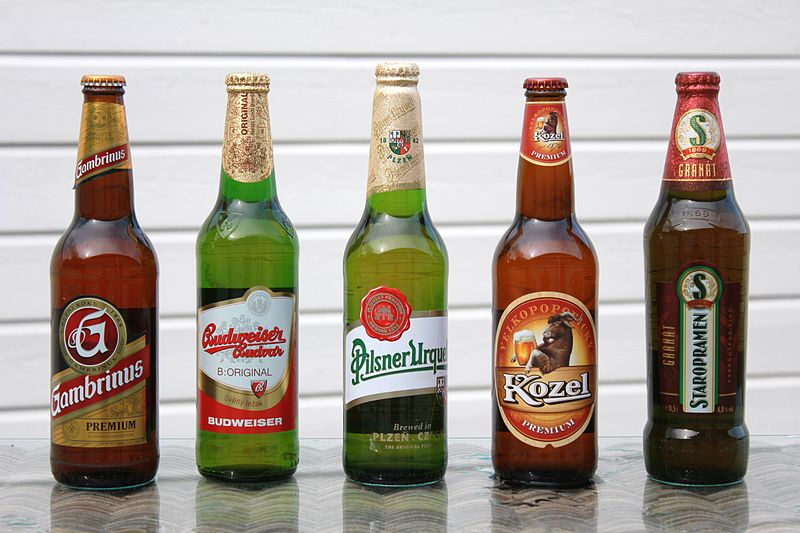

In [13]:
image_path = 'beer.jpeg'
image = Image.open(image_path)
image

In [14]:
with open("beer.jpeg", "rb") as img:
    response = client.detect_moderation_labels( Image={"Bytes":img.read()})

In [15]:
response

{'ModerationLabels': [{'Confidence': 97.6474380493164,
   'Name': 'Alcoholic Beverages',
   'ParentName': 'Alcohol'},
  {'Confidence': 97.6474380493164, 'Name': 'Alcohol', 'ParentName': ''}],
 'ModerationModelVersion': '6.1',
 'ResponseMetadata': {'RequestId': '55b06ca4-0b72-4433-9df5-08e3896c08bf',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '55b06ca4-0b72-4433-9df5-08e3896c08bf',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '202',
   'date': 'Thu, 07 Sep 2023 10:26:40 GMT'},
  'RetryAttempts': 0}}

This time, alcoholic beverages were detected!

For a list of all functions rekognition provides, take a look [here](https://docs.aws.amazon.com/rekognition/)